## array

### 1431

In [ ]:
class Solution:
    def kidsWithCandies(self, candies, extraCandies):
        result = []
        maxi = max(candies)
        for i in candies:
            result.append(i + extraCandies >= maxi)
        return result
        

In [ ]:
res = Solution()
candies = [2,3,5,1,3]
extraCandies = 1

In [ ]:
print(res.kidsWithCandies(candies, extraCandies))

### 1295

Given an array nums of integers, return how many of them contain an even number of digits.

Example 1:

Input: nums = [12,345,2,6,7896]
Output: 2

变字符串判断长度，注意 for if的用法

In [ ]:
class Solution:
    def findNumbers(self, nums):
        return sum(1 for num in nums if len(str(num)) % 2 ==0)

In [ ]:
res = Solution()
nums = [12,345,2,6,7896]

In [ ]:
res.findNumbers(nums)

In [ ]:
class Solution:
    def findNumbers(self, nums):
        return len([num for num in nums if len(str(num)) % 2 ==0])

In [ ]:
res = Solution()
nums = [12,345,2,6,7896]

In [ ]:
res.findNumbers(nums)

### 16. 3Sum Closest 最接近三数，指针

In [ ]:
Given an array nums of n integers and an integer target, find three integers in nums such that the sum is closest to target. Return the sum of the three integers. You may assume that each input would have exactly one solution.

Example 1:

Input: nums = [-1,2,1,-4], target = 1
Output: 2
Explanation: The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).


In [ ]:
class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        nums = sorted(nums)
        mindif = float('inf')
        res = 0
        for i in range(len(nums)-2):
            j = i + 1
            k = len(nums) - 1
            while j < k:
                s3 = nums[i] + nums[j] + nums[k]
                
                if abs(s3 - target) < mindif:
                    mindif = abs(s3 - target)
                    res = s3
                if s3 == target:
                    return s3
                elif s3 < target:
                    j += 1
                else:
                    k -= 1
        return res

先排序，固定一个，在双指针另外两个，排序之后可以根据大小移动jk

In [32]:
a = [
  [1,3],
  [1,5]
]

In [35]:
[x[:1] for x in a]

[[1], [1]]

In [14]:
class Solution:
    def minPathSum(self, grid):
        m = len(grid)
        n = len(grid[0])
        if m == 1:
            return sum(grid[0])
        if n == 1:
            return sum(x[0] for x in grid)
        return grid[m-1][n-1] + min(self.minPathSum(grid[:m-1][:]), self.minPathSum(grid[:][:n-1]))

### 64. Minimum Path Sum

In [ ]:
Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

Example:

Input:
[
  [1,3,1],
  [1,5,1],
  [4,2,1]
]
Output: 7
Explanation: Because the path 1→3→1→1→1 minimizes the sum.

In [ ]:
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if i == 0 and j == 0:
                    pass
                elif i == 0:
                    grid[i][j] = grid[i][j-1] + grid[i][j]
                elif j == 0:
                    grid[i][j] = grid[i-1][j] + grid[i][j]
                else:
                    grid[i][j] = grid[i][j] + min(grid[i-1][j], grid[i][j-1])
        return grid[-1][-1]

动态规划，直接修改grid

四个if

1、[0][0]不动

2、i=0，第一行，等于自身值加左边算出的最小路径

3，j = 0， 第一列， 加上面

4、走到当前单元格 (i,j) 的最小路径和 = (i,j)的值+min((i-1,j), (i,j-1))

### three sum

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        hashtable = dict()
        for num in nums:
            if hashtable.get(num, -1) == -1:
                hashtable[num] = 1
            else:
                hashtable[num] += 1

        x = [key for key in hashtable]
        x.sort()
        # i<=j<=z   z = -i-j
        for i in x:
            if i > 0:
                break
            hashtable[i] -= 1
            for j in x:
                if i + j > 0:
                    break
                z = -i - j
                if j < i or z < j:
                    continue

                count_j = hashtable.get(j)
                if count_j == 0:
                    continue
                else:
                    hashtable[j] -= 1
                
                count_z = hashtable.get(z, -1)
                if count_z <= 0:
                    pass
                else:
                    res.append([i,j,z])
                hashtable[j] += 1
            hashtable[i] += 1

        return res

## 字符串

### 5. 最长回文子串

In [ ]:
给定一个字符串 s，找到 s 中最长的回文子串。你可以假设 s 的最大长度为 1000。

示例 1：

输入: "babad"
输出: "bab"
注意: "aba" 也是一个有效答案。

示例 2：

输入: "cbbd"
输出: "bb"


In [ ]:
#经典dp
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        n = len(s)
        if n == 0:
            return ''
        res = s[0]
        dp = [[False] * n for _ in s ]

        for L in range(n): #长度L从0 -- n-1
            for i in range(n - L):
                j = i + L
                if L == 0:#单个字符一定是回文
                    dp[i][j] = True

                elif L == 1:#两个字符直接看两个是不是相等
                    if s[i] == s[j]:
                        dp[i][j] = True
                    
                else:
                    if dp[i+1][j-1]  and  (s[i] == s[j]): #长度大于2，看i，j是否相等，以及dp[i+1][j-1]是不是回文
                        dp[i][j] = True
                if dp[i][j] and (L+1 > len(res)):
                    res = s[i:j+1]
        return res

## LinkeList

### 1290

Given head which is a reference node to a singly-linked list. The value of each node in the linked list is either 0 or 1. The linked list holds the binary representation of a number.

Return the decimal value of the number in the linked list.

Input: head = [1,0,1]

Output: 5

Explanation: (101) in base 2 = (5) in base 10

In [ ]:
class Solution:
    def getDecimalValue(self, head) -> int:
        res = 0
        while head is not None:
            res = res * 2 + head.val
            head = head.next
        return res

链表从头开始拿元素，[1,0,1]  res = res * 2 + head.val, 拿出来加入到res，res每次乘2，可换成十进制。

### 24

Given a linked list, swap every two adjacent nodes and return its head.

You may not modify the values in the list's nodes, only nodes itself may be changed.

 

Example:

Given 1->2->3->4, you should return the list as 2->1->4->3.

In [ ]:
class ListNode:
    def __init__(self, x):
    self.val = x
    self.next = None
class Solution:
    def swapPairs(self, head) :
        newhead = ListNode(-1)
        newhead.next = head#创建一个新的表头节点
        h = newhead
        while newhead.next and newhead.next.next:#后面两个都有，交换指向
            p = newhead.next
            newhead.next = newhead.next.next
            p.next = newhead.next.next
            newhead.next.next = p
            newhead = newhead.next.next
        return h.next

###  141 环形链表，快慢指针

In [ ]:
Given a linked list, determine if it has a cycle in it.

To represent a cycle in the given linked list, we use an integer pos which represents the position (0-indexed) in the linked list where tail connects to. If pos is -1, then there is no cycle in the linked list.

 

Example 1:

Input: head = [3,2,0,-4], pos = 1
Output: true
Explanation: There is a cycle in the linked list, where tail connects to the second node.


In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        if head is None or head.next is None:
            return False
        head1 = head
        head2 = head.next
        while True:
            if head2.next is None or head2.next.next is None:
                return False
            if head1 == head2:
                return True
            head1 = head1.next
            head2 = head2.next.next

有环，则快指针会追上慢指针

## 栈

### 225

Implement the following operations of a stack using queues.

    push(x) -- Push element x onto stack.
    pop() -- Removes the element on top of the stack.
    top() -- Get the top element.
    empty() -- Return whether the stack is empty.


Notes:

    You must use only standard operations of a queue -- which means only push to back, peek/pop from front, size, and is empty operations are valid.
    Depending on your language, queue may not be supported natively. You may simulate a queue by using a list or deque (double-ended queue), as long as you use only standard operations of a queue.
    You may assume that all operations are valid (for example, no pop or top operations will be called on an empty stack).


In [ ]:
class MyStack:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.elem = []


    def push(self, x: int) -> None:
        """
        Push element x onto stack.
        """
        self.elem.append(x)

        #只能使用 .append .pop(0) [0] len is empty


    def pop(self) -> int:
        """
        Removes the element on top of the stack and returns that element.
        """
        p = []
        for i in range(len(self.elem)-1):
            p.append(self.elem.pop(0))
        q = self.elem[0]
        self.elem = p
        return q


    def top(self) -> int:
        """
        Get the top element.
        """
        p = self.elem.copy()
        for i in range(len(p)-1):
            p.pop(0)
        return p[0]
            
    def empty(self) -> bool:
        """
        Returns whether the stack is empty.
        """
        return len(self.elem) == 0 

list.copy()方法注意，直接给个别名， 用.pop append 等方法会直接修改掉内存里的值，原变量名也会被改掉。

In [ ]:
S = MyStack()
S.empty()
S.elem

In [ ]:
S.push(1)
S.push(2)
S.push(3)
S.push(4)
S.elem

In [ ]:
S.pop()
S.elem

## 二叉树

### 94. 二叉树的中序遍历  迭代/递归

In [ ]:
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        #递归
        self.res = []

        def mid(node):
            if node is None:
                return
            mid(node.left)
            self.res.append(node.val)
            mid(node.right)
            
        mid(root)
        return self.res
#栈
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        #迭代
        res = []
        stack = []
        while root or len(stack) != 0:
            while root:
                stack.append(root)
                root = root.left
            top = stack.pop()
            res.append(top.val)
            root = top.right
        return res 

### 二叉树的先序遍历 迭代/递归

In [ ]:
#递归
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        self.res = []
        self.preorder(root)
        return self.res

    def preorder(self, t):
        if t is None:
            return
        self.res.append(t.val)
        self.preorder(t.left)
        self.preorder(t.right)
#迭代
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        stack = []
        #碰到节点直接输出，右节点入栈，左路全部输出后，切换到最近入栈的一个右节点
        while root:
            while root:
                res.append(root.val)
                if root.right:
                    stack.append(root.right)
                root = root.left
            if len(stack) == 0:
                root = None
            else:
                root = stack.pop()
        return res 

### 二叉树的后序遍历 迭代/递归

In [ ]:

class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        def sol(t):
            if t is None:
                return
            sol(t.left)
            sol(t.right)
            res.append(t.val)
        sol(root)
        return res


class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        #把前序遍历调整为 中 右 左，最后再倒序输出
        res = []
        stack = []

        while root:
            while root:
                res.append(root.val)
                if root.left:
                    stack.append(root.left)
                root = root.right
            if len(stack) == 0:
                root = None
            else:
                root = stack.pop()
        return res[::-1]


### 102

Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).

For example:
Given binary tree [3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7

return its level order traversal as:

[
  [3],
  [9,20],
  [15,7]
]

注意广度优先遍历，如果不需要知道目前的层数，就进队列出队列，比较简单
要分层处理, for控制住每层的循环次数，如下

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x, left=None, right= None):
        self.val = x
        self.left = left
        self.right = right

class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        queue = [root]
        res = []
        while len(queue) > 0:
            cur_layer = []
            for _ in range(len(queue)):
                top = queue.pop(0)
                if top is not None:
                    cur_layer.append(top.val)
                    queue.append(top.left)
                    queue.append(top.right)
            if len(cur_layer) > 0:#最后一行会全是None，会输出一个空[]
                res.append(cur_layer)
        return res 

In [ ]:
T = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))

In [ ]:
sol = Solution()

In [ ]:
sol.levelOrder(T)

### 543

Given a binary tree, you need to compute the length of the diameter of the tree. The diameter of a binary tree is the length of the longest path between any two nodes in a tree. This path may or may not pass through the root.

Example:
Given a binary tree

          1
         / \
        2   3
       / \     
      4   5    

Return 3, which is the length of the path [4,2,1,3] or [5,2,1,3].

Note: The length of path between two nodes is represented by the number of edges between them. 

diameter = 左子树深度加右子树深度，最长路不一定经过根节点，要遍历每一个节点

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
    self.val = x
    self.left = None
    self.right = None

class Solution:
    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        self.res = 0
        def depth(Node): #depth函数计算的是数的深度
            if Node is None:
                return 0
            else:
                L = depth(Node.left)
                R = depth(Node.right)
                dia = L + R
                self.res = max(self.res, dia)
                return 1 + max(L, R)
        depth(root)
        return self.res 

在depth函数计算根节点的深度时，由于递归的性质，每一个节点的depth已经被遍历到了，
在计算出一个节点的depth时，直接计算以它为根节点的diameter，就能直接遍历到所有节点计算diameter

注意，res要设置为类属性，否则递归的时候，res在外层定义，在递归内层会没有定义

### 98

Given a binary tree, determine if it is a valid binary search tree (BST).

Assume a BST is defined as follows:

    The left subtree of a node contains only nodes with keys less than the node's key.
    The right subtree of a node contains only nodes with keys greater than the node's key.
    Both the left and right subtrees must also be binary search trees.

 

Example 1:

    2
   / \
  1   3

Input: [2,1,3]
Output: true

用一个辅助函数，迭代判断每一个节点是否在应在的范围内

对于根节点，其范围为$(-\infty,+\infty)$

对于一个节点的左节点，其范围变为(父节点的下界, 父节点的值)，因为它要小于父节点

对于一个节点的右节点，其范围变为(父节点的值, 父节点的上界)，因为它要大于父节点

In [ ]:
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:

        def isvalidNode(Node, lower=float('-inf'), upper=float('inf')):
            if Node is None:
                return True
            
            val = Node.val
            if val <= lower or val >= upper:
                return False

            if not isvalidNode(Node.left, lower, val):
                return False
            
            if not isvalidNode(Node.right, val, upper):
                return False

            return True

        return isvalidNode(root)

In [ ]:
# 二叉搜索树中序遍历 结果递增， 以此来判断是否是二叉搜索书
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        self.last = float('-inf')
        self.if_valid = True

        def mid_order(root):
            if self.if_valid is False:
                return
            if root is None:
                return

            mid_order(root.left)

            if root.val > self.last:
                self.last = root.val
            else:
                self.if_valid = False
                return
            
            mid_order(root.right)
        
        mid_order(root)
        return self.if_valid

### 96 不同的二叉搜索树

In [ ]:
给定一个整数 n，求以 1 ... n 为节点组成的二叉搜索树有多少种？

示例:

输入: 3
输出: 5
解释:
给定 n = 3, 一共有 5 种不同结构的二叉搜索树:

   1         3     3      2      1
    \       /     /      / \      \
     3     2     1      1   3      2
    /     /       \                 \
   2     1         2                 3


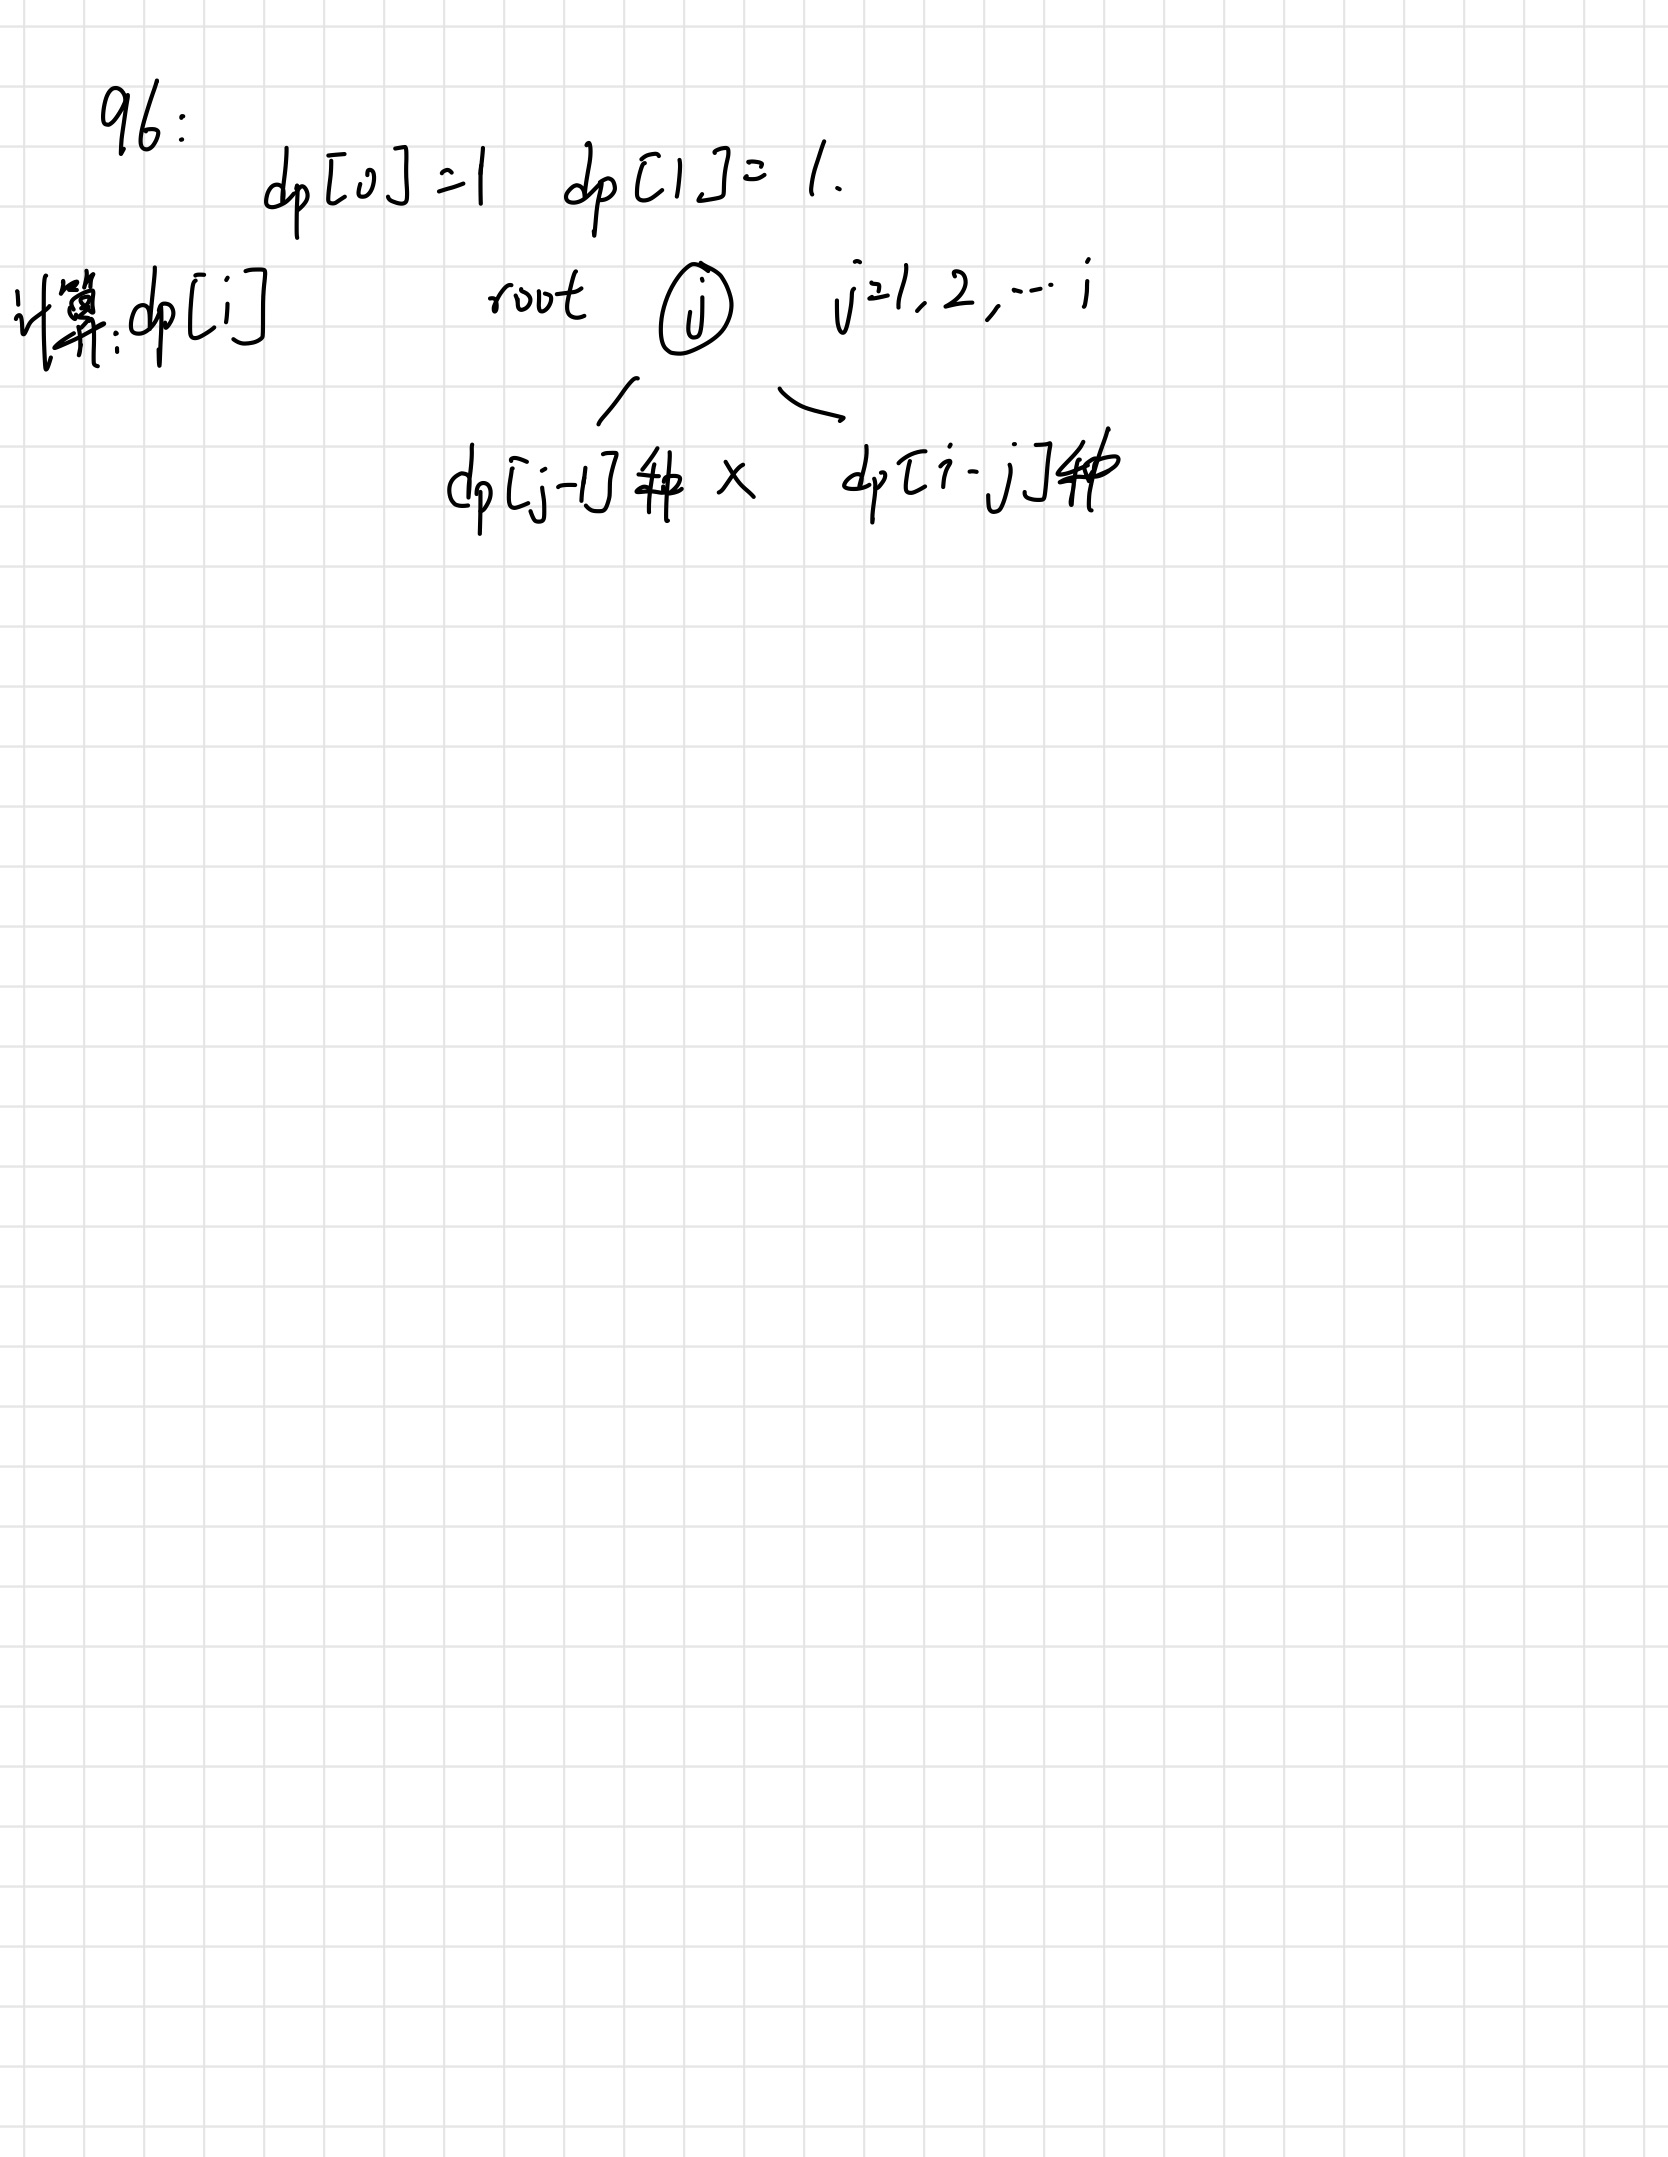

### 100/101

相同的树和对称的树

一个是相同路径相等，左右左右 = 左右左右
一个是对称路径相等，左右左右 = 右左右左

In [ ]:
Given two binary trees, write a function to check if they are the same or not.

Two binary trees are considered the same if they are structurally identical and the nodes have the same value.

Example 1:

Input:     1         1
          / \       / \
         2   3     2   3

        [1,2,3],   [1,2,3]

Output: true

In [ ]:
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        if p is None and q is None:
            return True
        if p is None or q is None:
            return False
        if p.val != q.val:
            return False
        if not self.isSameTree(p.left, q.left):
            return False
        if not self.isSameTree(p.right, q.right):
            return False
        return True

In [ ]:
Given a binary tree, check whether it is a mirror of itself (ie, symmetric around its center).

For example, this binary tree [1,2,2,3,4,4,3] is symmetric:

    1
   / \
  2   2
 / \ / \
3  4 4  3

 

But the following [1,2,2,null,3,null,3] is not:

    1
   / \
  2   2
   \   \
   3    3

In [ ]:
class Solution:
    def isSymmetric(self, root: TreeNode) -> bool:

        def sym(Node1, Node2):
            if Node1 is None and Node2 is None:
                return True
            if Node1 is None or Node2 is None:
                return False
            if Node1.val != Node2.val:
                return False
            if not sym(Node1.left, Node2.right):
                return False
            if not sym(Node1.right, Node2.left):
                return False
            return True
        
        if root is None:
            return True
        return sym(root.left, root.right)

### 105 通过前序和中序生成一棵树

Given preorder and inorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]

Return the following binary tree:

    3
   / \
  9  20
    /  \
   15   7


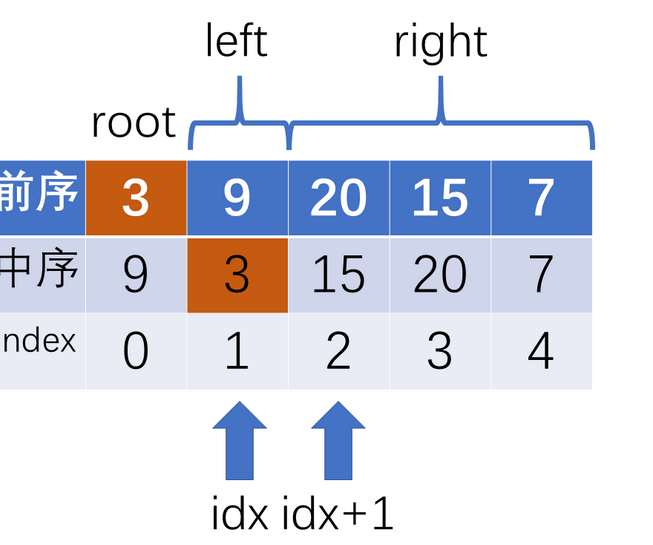

1. 通过前序获得根
2. 定位根在中序中的位置，前面是左子树，后面是右子树
3. 分别获得root.left 的前序和中序， root.right 的前序和中序,迭代

In [ ]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:

        if preorder == [] and inorder == []:
            return
        root = TreeNode(preorder[0])
        idx = inorder.index(preorder[0])
        root.left = self.buildTree(preorder[1:1+idx], inorder[0:idx])
        root.right = self.buildTree(preorder[1+idx:], inorder[idx+1:])
        return root

### 105 通过后序和中序生成一棵树

Given inorder and postorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]

Return the following binary tree:

    3
   / \
  9  20
    /  \
   15   7


In [ ]:
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        #通过后序的末尾元素获得根
        if inorder == [] and postorder == []:
            return
        root = TreeNode(postorder[-1])
        idx = inorder.index(postorder[-1])
        root.left = self.buildTree(inorder[0:idx], postorder[0:idx])
        root.right= self.buildTree(inorder[idx+1:], postorder[idx:-1])
        return root

### 236 二叉树的最近公共祖先

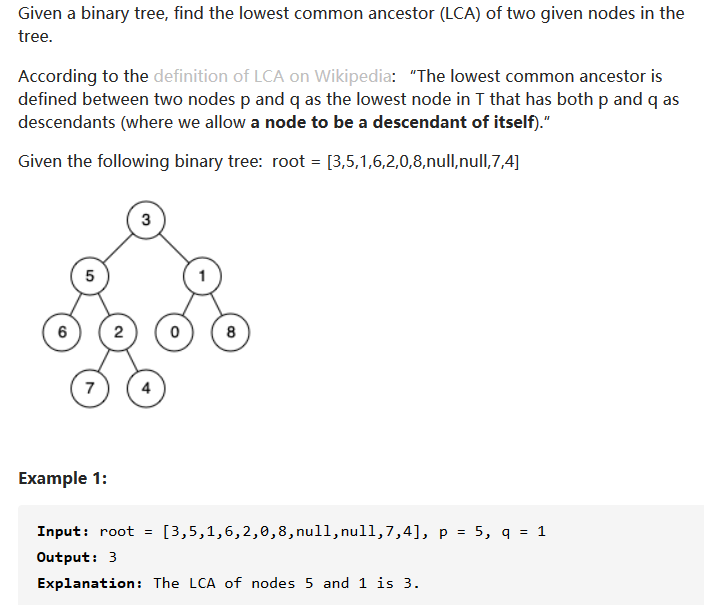

自底向上返回，遇到p或q返回

如果p是q的祖先， 那p在q上面，到p的时候就会一路返回p，直到root

如果p和q有一个最近祖先x，那pq分别在x两边，所以当一个点的left返回不是None, right返回不是None，他就是最近祖先

return left if left is not None else right, 一路自底向上返回过去

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if root is None: 
            return root
        if root is p or root is q: 
            return root
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        if left is not None and right is not None: 
            return root
        if left is None: 
            return right
        if right is None: 
            return left

### 235 二叉搜索树的最近公共祖先

In [ ]:
给定一个二叉搜索树, 找到该树中两个指定节点的最近公共祖先。

百度百科中最近公共祖先的定义为：“对于有根树 T 的两个结点 p、q，最近公共祖先表示为一个结点 x，满足 x 是 p、q 的祖先且 x 的深度尽可能大（一个节点也可以是它自己的祖先）。”

例如，给定如下二叉搜索树:  root = [6,2,8,0,4,7,9,null,null,3,5]

 

示例 1:

输入: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8
输出: 6 
解释: 节点 2 和节点 8 的最近公共祖先是 6。


In [1]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        maxi = max(p.val, q.val)
        mini = min(p.val, q.val)
        if root.val < mini:
            return self.lowestCommonAncestor(root.right, p, q)
        elif root.val > maxi:
            return self.lowestCommonAncestor(root.left, p, q)
        else:
            return root

根据二叉搜索树的特点，从root开始从顶向下递归

p q 分别在左右子树，则是答案，否则带入左或右

### 112 path sum

In [ ]:
Given a binary tree and a sum, determine if the tree has a root-to-leaf path such that adding up all the values along the path equals the given sum.

Note: A leaf is a node with no children.

Example:

Given the below binary tree and sum = 22,

      5
     / \
    4   8
   /   / \
  11  13  4
 /  \      \
7    2      1

return true, as there exist a root-to-leaf path 5->4->11->2 which sum is 22.

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/path-sum
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def hasPathSum(self, root: TreeNode, sum: int) -> bool:
        if root is None:
            return False
        if root.left is None and root.right is None:
            return sum == root.val
        return self.hasPathSum(root.left, sum - root.val) or self.hasPathSum(root.right, sum - root.val)

### 110. Balanced Binary Tree

In [ ]:
Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

    a binary tree in which the left and right subtrees of every node differ in height by no more than 1.

 

Example 1:

Given the following tree [3,9,20,null,null,15,7]:

    3
   / \
  9  20
    /  \
   15   7



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def isBalanced(self, root: TreeNode) -> bool:
        if self.helper(root) == -1:
            return False
        else:
            return True
 
    def helper(self, root):
        if root is None:
            return 0
        leftdepth = self.helper(root.left)
        rightdepth = self.helper(root.right)
        if leftdepth == -1 or rightdepth == -1:
            return -1
        if abs(leftdepth - rightdepth) <= 1:
            return 1 + max(leftdepth, rightdepth)
        else:
            return -1

如果root左右相差小于2，则返回已root为节点的最大深度，否则一路返回-1，表明不是高度平衡的树

自底向上

### 124. Binary Tree Maximum Path Sum

In [ ]:
Given a non-empty binary tree, find the maximum path sum.

For this problem, a path is defined as any sequence of nodes from some starting node to any node in the tree along the parent-child connections. The path must contain at least one node and does not need to go through the root.

Example 1:

Input: [1,2,3]

       1
      / \
     2   3

Output: 6

Example 2:

Input: [-10,9,20,null,null,15,7]

   -10
   / \
  9  20
    /  \
   15   7

Output: 42



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        self.res = -float('inf')
        self.helper(root)
        return self.res



    def helper(self, root):
        if root is None:
            return 0
        left = max(self.helper(root.left), 0)
        right = max(self.helper(root.right), 0)
        self.res = max(self.res, root.val + left + right)
        return root.val + max(left, right)#return只能返回左右一边


## 回溯算法

### 46 全排列

Given a collection of distinct integers, return all possible permutations.

Example:

Input: [1,2,3]
Output:
[
  [1,2,3],
  [1,3,2],
  [2,1,3],
  [2,3,1],
  [3,1,2],
  [3,2,1]
]


In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:

        res = []
        length = len(nums)
        visit = [False for _ in range(length)]#记录track是否访问过


        def backtrack(track, visit):
            if len(track) == length:
                res.append(track[:])
                return
            for i in range(length):
                if visit[i] is True:#找出可行的方向
                    continue
                track.append(nums[i])#把方向加入路径
                visit[i] = True #此方向不可行了
                backtrack(track, visit) #继续前进
                track.pop() #回溯
                visit[i] = False #回溯
        
        backtrack([], visit)#别把res传进去
        return res

### 22 括号生成

In [ ]:
Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

For example, given n = 3, a solution set is:

[
  "((()))",
  "(()())",
  "(())()",
  "()(())",
  "()()()"
]


In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:

        def backtrack(track):
            if len(track) == 2 * n:
                res.append(track[:])
                return

            lefttime = track.count('(')
            righttime = track.count(')')
            diff = lefttime - righttime

            #可行路径只有左括号后右括号，左括号没用完，有一个左，左比有多，有一个右
            dolist = ['('] * (n - lefttime > 0) + [')'] * (diff > 0)

            for i in dolist:
                track += i
                backtrack(track)
                track = track[:-1]

        res = []
        backtrack('')
        return res

### 51. N-皇后

In [ ]:
n 皇后问题研究的是如何将 n 个皇后放置在 n×n 的棋盘上，并且使皇后彼此之间不能相互攻击。

上图为 8 皇后问题的一种解法。

给定一个整数 n，返回所有不同的 n 皇后问题的解决方案。

每一种解法包含一个明确的 n 皇后问题的棋子放置方案，该方案中 'Q' 和 '.' 分别代表了皇后和空位。

示例：

输入：4
输出：[
 [".Q..",  // 解法 1
  "...Q",
  "Q...",
  "..Q."],

 ["..Q.",  // 解法 2
  "Q...",
  "...Q",
  ".Q.."]
]
解释: 4 皇后问题存在两个不同的解法。

 

提示：

    皇后彼此不能相互攻击，也就是说：任何两个皇后都不能处于同一条横行、纵行或斜线上。


回溯算法  

queue记录皇后被放在第几列，queue是公用的  
因为深度优先的性质，得到一个可行解时，queue一定从头到尾被赋值过一遍  
所以可以公用

column， diagnoal_1 = set()，diagonal_2也共用  
由于回溯的性质，不会相互造成影响

In [ ]:
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        res = []
        column = set()
        #记录右-左
        diagnoal_1 = set()
        #记录左+右
        diagonal_2 = set()
        queue = [-1] * n

        def backtrack(row):
            if row == n:
                #成功找到一种可能
                trans = generate(queue)
                res.append(trans)
                return
            for i in range(n):
                if i in column or i - row in diagnoal_1 or i + row in diagonal_2:
                    continue
                queue[row] = i  #queue一定从头到尾被赋值过一遍  
                column.add(i)
                diagnoal_1.add(i - row)
                diagonal_2.add(i + row)
                backtrack(row + 1)
                column.remove(i)
                diagnoal_1.remove(i - row)
                diagonal_2.remove(i + row)
        
        def generate(lst):
            trans = []
            for i in range(n-1, -1, -1):
                c = lst[i] + 1
                board = '.' * (c-1) + 'Q' + '.' * (n-c)
                trans.append(board)
            return trans

        backtrack(0)
        return res 

### 77. 组合

In [ ]:
给定两个整数 n 和 k，返回 1 ... n 中所有可能的 k 个数的组合。

示例:

输入: n = 4, k = 2
输出:
[
  [2,4],
  [3,4],
  [2,3],
  [1,2],
  [1,3],
  [1,4],
]


In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:

        res = []
        #回溯中共用的 set
        hashset = set()
        for i in range(1, n+1):
            hashset.add(i)

        def backtrack_dfs(track):
            lth = len(track)
            if lth == k:
                res.append(track)
                return

            #要求数字依次递增来解决重复
            if lth == 0:
                last = 0
            else:
                last = track[-1]
                
            #剪枝
            if k - lth > n - last:
                return
            
            for num in range(last+1, n+1):
                if num not in hashset:
                    continue
                else:
                    track.append(num)
                    hashset.remove(num)
                    backtrack_dfs(track[:])
                    track.pop()
                    hashset.add(num)
        
        backtrack_dfs([])
        return res

## dynamic programming

### 5. Longest Palindromic Substring

In [ ]:
Given a string s, find the longest palindromic substring in s. You may assume that the maximum length of s is 1000.

Example 1:

Input: "babad"
Output: "bab"
Note: "aba" is also a valid answer.

Example 2:

Input: "cbbd"
Output: "bb"



In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        
        n = len(s)
        if n == 0:
            return ''
        res = s[0]
        dp = [[False] * n for _ in s ]

        for L in range(n): #长度L从0 - n-1
            for i in range(n - L):
                j = i + L
                if L == 0:
                    dp[i][j] = True

                elif L == 1:
                    if s[i] == s[j]:
                        dp[i][j] = True
                    
                else:
                    if dp[i+1][j-1]  and  (s[i] == s[j]): #递归方程总需要长度短的 存在，所以要用L来循环，控制长度
                        dp[i][j] = True
                if dp[i][j] and (L+1 > len(res)):
                    res = s[i:j+1]
        return res

### 718. Maximum Length of Repeated Subarray

In [ ]:
Given two integer arrays A and B, return the maximum length of an subarray that appears in both arrays.

Example 1:

Input:
A: [1,2,3,2,1]
B: [3,2,1,4,7]
Output: 3
Explanation: 
The repeated subarray with maximum length is [3, 2, 1].

 

Note:

    1 <= len(A), len(B) <= 1000
    0 <= A[i], B[i] < 100

In [ ]:
class Solution:
    def findLength(self, A: List[int], B: List[int]) -> int:
        lena = len(A)
        lenb = len(B)
        if lena == 0 or lenb == 0:
            return 0
        dp = [[-1] * lenb for _ in range(lena)]
        for i in range(lena):
            for j in range(lenb):
                if i == 0:
                    dp[i][j] = 1 if (A[0] == B[j]) else 0
                    continue
                if j == 0:
                    dp[i][j] = 1 if (A[i] == B[0]) else 0
                    continue
                if A[i] != B[j]:
                    dp[i][j] = 0
                else:
                    dp[i][j] = dp[i-1][j-1] + 1
        
        res = [max(sub) for sub in dp]
        return max(res)

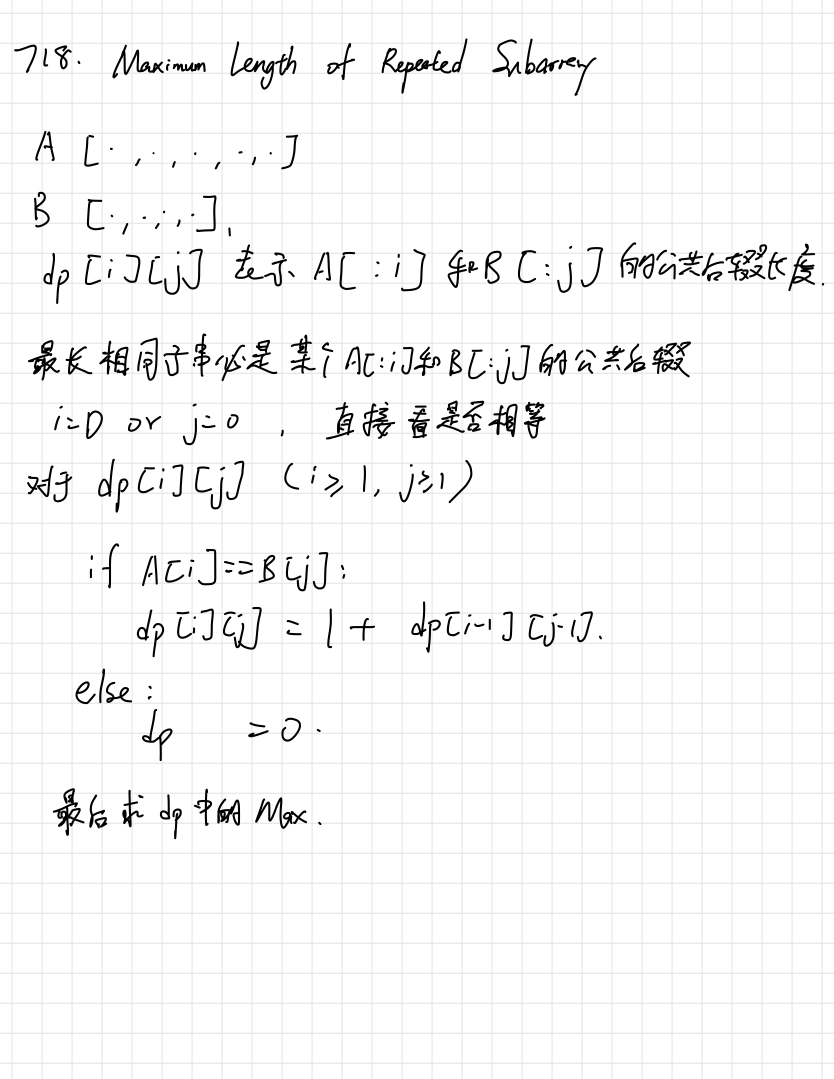

### 174. Dungeon Game

In [ ]:
一些恶魔抓住了公主（P）并将她关在了地下城的右下角。地下城是由 M x N 个房间组成的二维网格。我们英勇的骑士（K）最初被安置在左上角的房间里，他必须穿过地下城并通过对抗恶魔来拯救公主。

骑士的初始健康点数为一个正整数。如果他的健康点数在某一时刻降至 0 或以下，他会立即死亡。

有些房间由恶魔守卫，因此骑士在进入这些房间时会失去健康点数（若房间里的值为负整数，则表示骑士将损失健康点数）；其他房间要么是空的（房间里的值为 0），要么包含增加骑士健康点数的魔法球（若房间里的值为正整数，则表示骑士将增加健康点数）。

为了尽快到达公主，骑士决定每次只向右或向下移动一步。


编写一个函数来计算确保骑士能够拯救到公主所需的最低初始健康点数。

例如，考虑到如下布局的地下城，如果骑士遵循最佳路径 右 -> 右 -> 下 -> 下，则骑士的初始健康点数至少为 7。
-2 (K) 	-3 	3
-5 	-10 	1
10 	30 	-5 (P)


说明:

    骑士的健康点数没有上限。
    任何房间都可能对骑士的健康点数造成威胁，也可能增加骑士的健康点数，包括骑士进入的左上角房间以及公主被监禁的右下角房间。


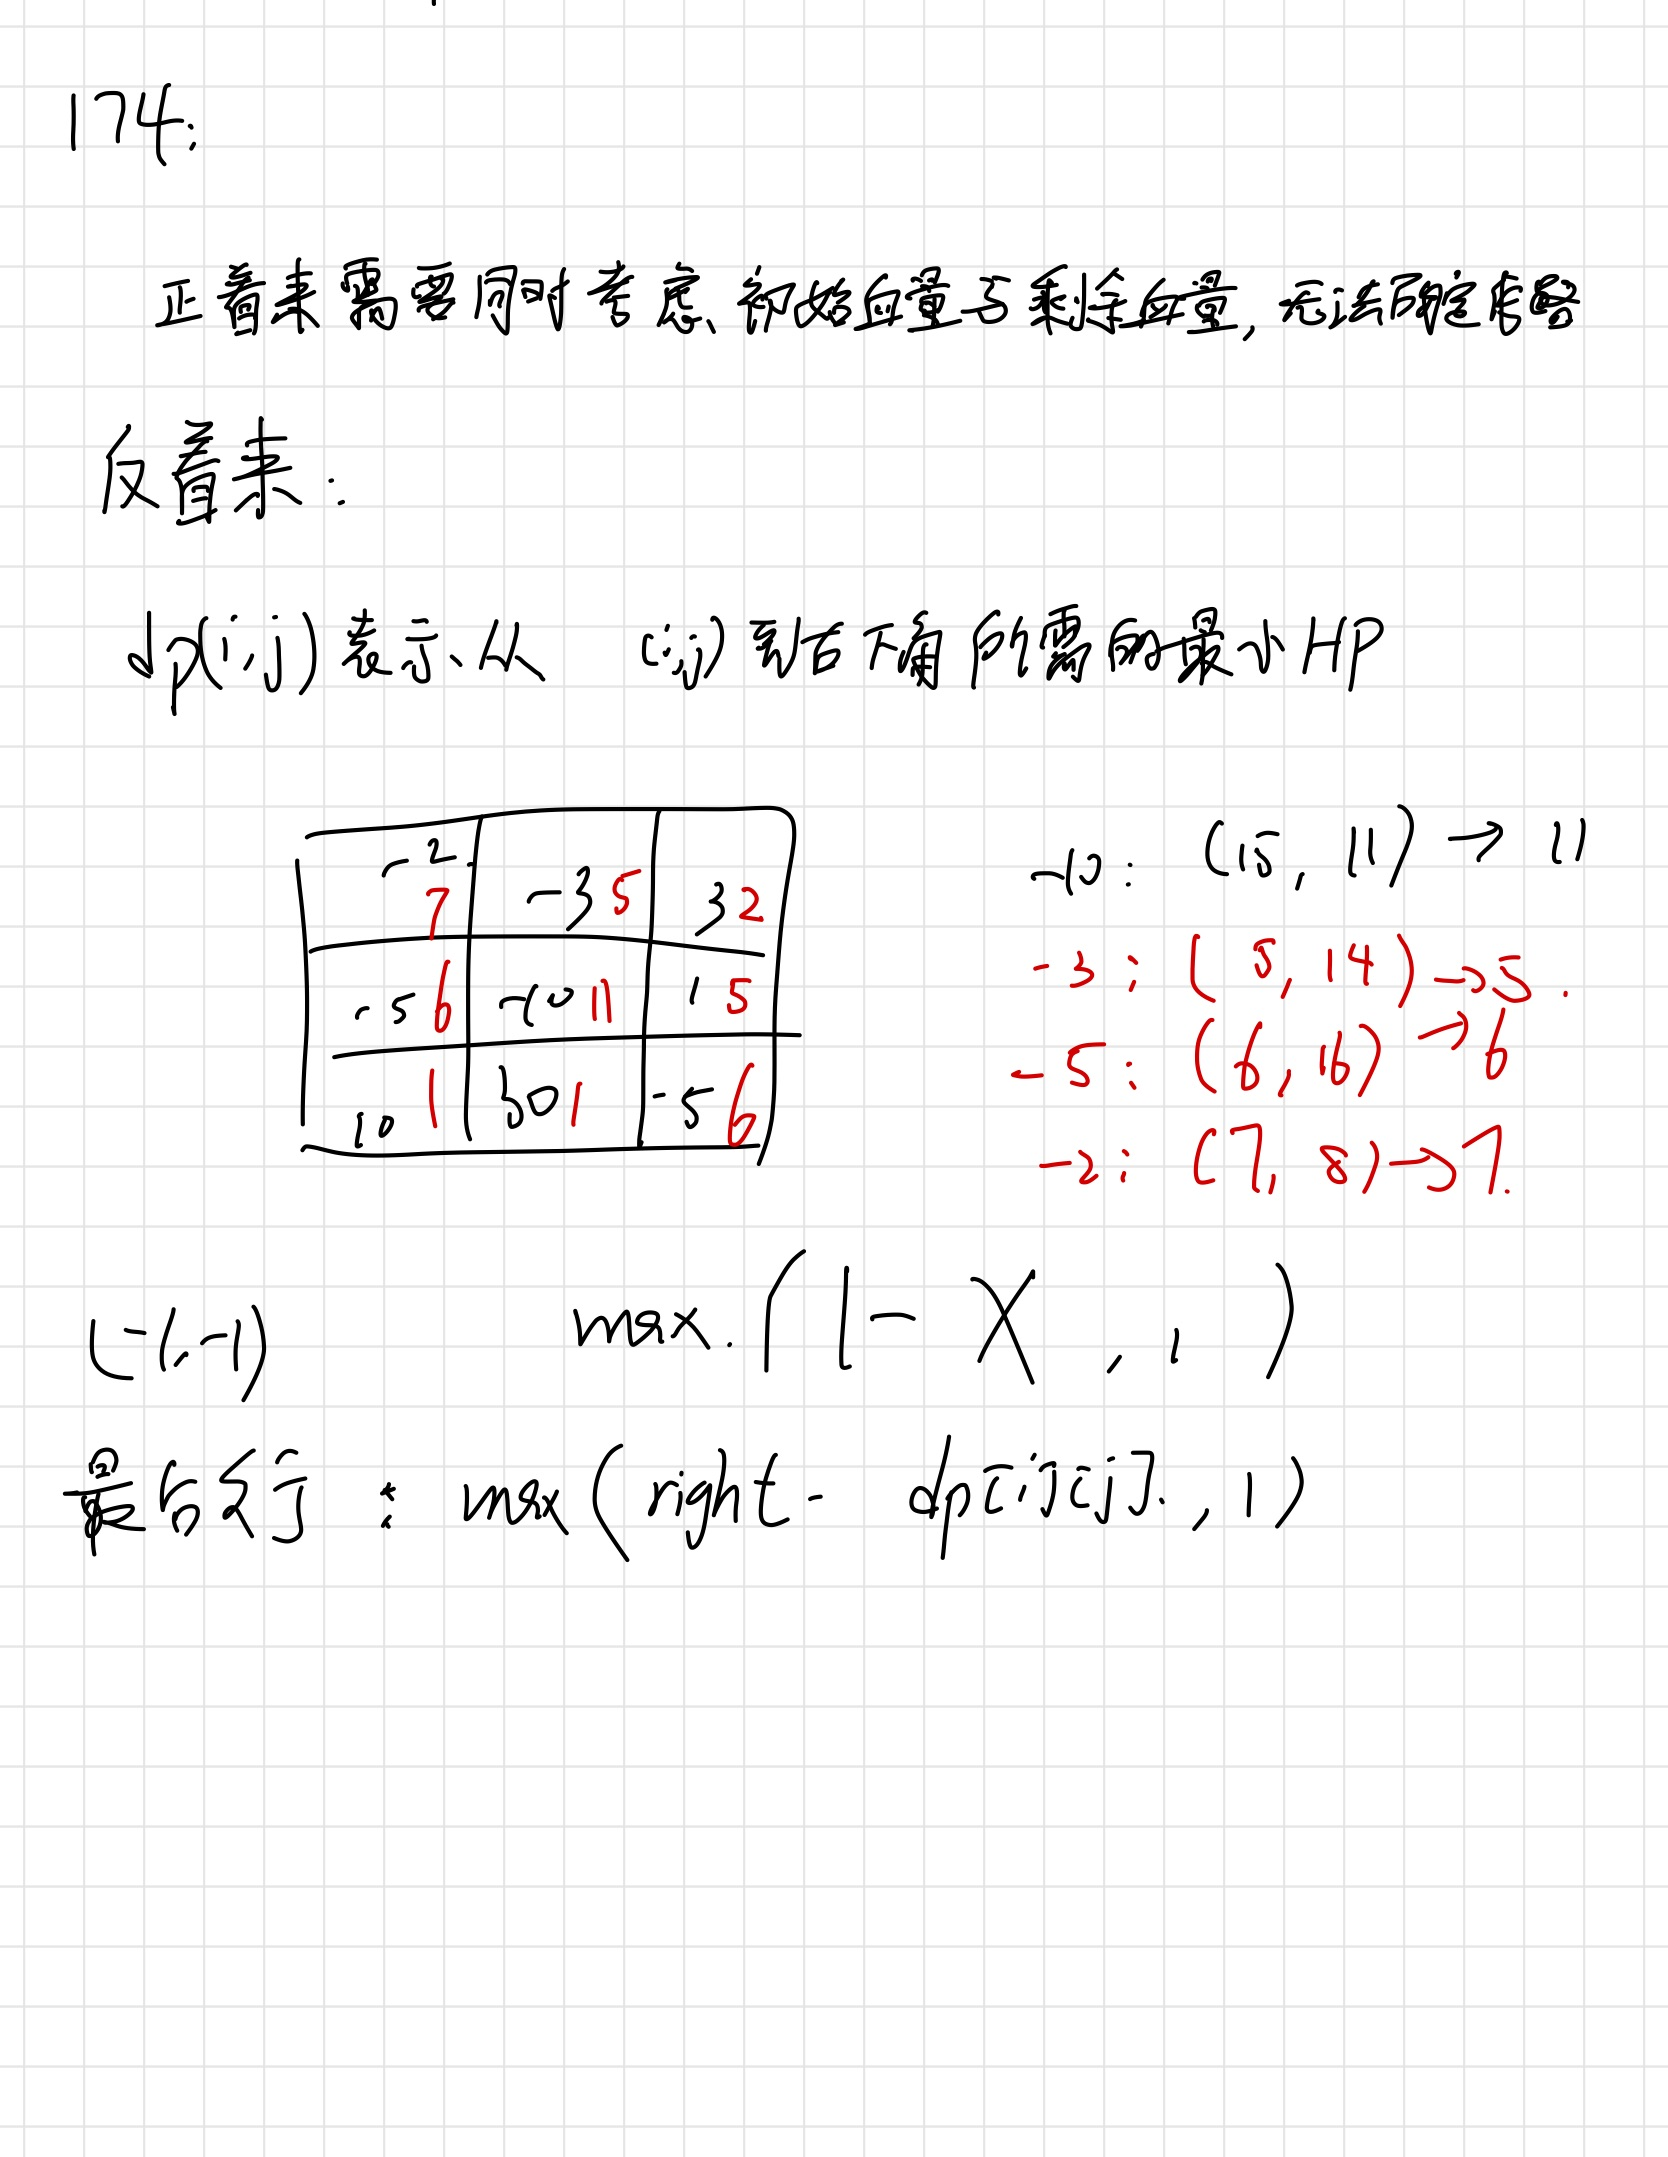

In [ ]:
class Solution:
    def calculateMinimumHP(self, dungeon: List[List[int]]) -> int:
        row = len(dungeon)
        column = len(dungeon[0])
        for i in reversed(range(row)):
            for j in reversed(range(column)):
                if i == row - 1 and j == column - 1:
                    dungeon[i][j] = max(1, 1 - dungeon[i][j])
                elif i == row - 1:
                    right = dungeon[i][j+1]
                    dungeon[i][j] = max(1, right - dungeon[i][j])
                elif j == column - 1:
                    down = dungeon[i+1][j]
                    dungeon[i][j] = max(1, down - dungeon[i][j])
                else:
                    right = dungeon[i][j+1]
                    down = dungeon[i+1][j]
                    step = min(right, down)
                    dungeon[i][j] = max(1, step - dungeon[i][j])
        return dungeon[0][0]

##  拓扑排序/ DFS / BFS

### 210. 课程表 II

In [ ]:
现在你总共有 n 门课需要选，记为 0 到 n-1。

在选修某些课程之前需要一些先修课程。 例如，想要学习课程 0 ，你需要先完成课程 1 ，我们用一个匹配来表示他们: [0,1]

给定课程总量以及它们的先决条件，返回你为了学完所有课程所安排的学习顺序。

可能会有多个正确的顺序，你只要返回一种就可以了。如果不可能完成所有课程，返回一个空数组。

示例 1:

输入: 2, [[1,0]] 
输出: [0,1]
解释: 总共有 2 门课程。要学习课程 1，你需要先完成课程 0。因此，正确的课程顺序为 [0,1] 。



#### BFS 广度优先， 直观

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        #BFS
        indegree = [0] * numCourses
        mapping = [[] for i in range(numCourses)] 
        res = []
        for course, precour in prerequisites:
            mapping[precour].append(course)
            indegree[course] += 1
        queue = [c for c in range(numCourses) if indegree[c] == 0]
        while len(queue) != 0:
            top = queue.pop(0)
            res.append(top)
            for c in mapping[top]:
                indegree[c] -= 1
                if indegree[c] == 0:
                    queue.append(c)
        if len(res) == numCourses:
            return res
        else:
            return []

#### DFS 深度优先， 栈

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        #DFS
        visited = [0] * numCourses
        mapping = [[] for i in range(numCourses)] 
        stack = []
        valid = True
        for course, precour in prerequisites:
            mapping[precour].append(course)
        def DFS(cur):
            nonlocal valid
            if visited[cur] == 1:
                valid = False
                return
            if visited[cur] == 2:
                return
            visited[cur] = 1
            for nextcur in mapping[cur]:
                DFS(nextcur)
                if valid is False:
                    return
            stack.append(cur)
            visited[cur] = 2
        for i in range(numCourses):
            if visited[i] == 0 and valid is True:
                DFS(i)
        if valid:
            return stack[::-1]
        else:
            return []

### 133. 克隆图

给你无向 连通 图中一个节点的引用，请你返回该图的 深拷贝（克隆）。

图中的每个节点都包含它的值 val（int） 和其邻居的列表（list[Node]）


In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = []):
        self.val = val
        self.neighbors = neighbors
"""

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':

        def dfs(node):
            if node in hashtable:
                return hashtable[node]
            else:
                node_copy = Node(node.val)
                hashtable[node] = node_copy 
            for nei in node.neighbors:
                nei_copy = dfs(nei)
                node_copy.neighbors.append(nei_copy)
            return node_copy

        hashtable = {}
        if node is None:
            return None
        return dfs(node)

### 491 递增序列

In [ ]:
给定一个整型数组, 你的任务是找到所有该数组的递增子序列，递增子序列的长度至少是2。

示例:

输入: [4, 6, 7, 7]
输出: [[4, 6], [4, 7], [4, 6, 7], [4, 6, 7, 7], [6, 7], [6, 7, 7], [7,7], [4,7,7]]

说明:

    给定数组的长度不会超过15。
    数组中的整数范围是 [-100,100]。
    给定数组中可能包含重复数字，相等的数字应该被视为递增的一种情况。


In [ ]:
class Solution:
    def findSubsequences(self, nums: List[int]) -> List[List[int]]:
        res = []
        duplicate = set()
        idx_g_value_ge = dict()
        for i in range(len(nums)):
            lst_i = []
            for j in range(i+1, len(nums)):
                if nums[j] >= nums[i]:
                    lst_i.append(j)
            idx_g_value_ge[i] = lst_i

        def dfs(temp, last_idx, str_marker):
            if str_marker in duplicate:
                return
            if len(temp) > 1:
                res.append(temp)
                duplicate.add(str_marker)
            next_all = idx_g_value_ge.get(last_idx, [])
            for next_index in next_all:
                value = nums[next_index]
                dfs(temp + [value], next_index, str_marker + '_' + str(value)) #marker一定要用_ 隔开，否则分不清13_15 和 1_3_15
            
        for i, num in enumerate(nums):
            dfs([num], i, str(num))
        return res 

## 位运算

### 计算二进制位中1 的个数

In [ ]:
#传统
def count_1(n):
    cnt = 0
    while n != 0:
        if (n & 1 == 1): #直接看最低位是不是0
            cnt += 1
        n >> 1 #右移
    return cnt


#方法二， 直接到最低的1
def count_1(n):
    cnt = 0
    while n != 0:
        n = n & (n-1)# n 和 n - 1 与运算， 相当于把最低位的1 变成 0 
        cnt += 1
    return cnt

### 191. 位1的个数

In [ ]:
编写一个函数，输入是一个无符号整数，返回其二进制表达式中数字位数为 ‘1’ 的个数（也被称为汉明重量）。

In [ ]:
class Solution:
    def hammingWeight(self, n: int) -> int:
        cnt = 0
        while n:
            n = n & (n-1)
            cnt += 1
        return cnt

### 190. 颠倒二进制位

In [ ]:
颠倒给定的 32 位无符号整数的二进制位。

 

示例 1：

输入: 00000010100101000001111010011100
输出: 00111001011110000010100101000000
解释: 输入的二进制串 00000010100101000001111010011100 表示无符号整数 43261596，
     因此返回 964176192，其二进制表示形式为 00111001011110000010100101000000。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/reverse-bits
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
class Solution:
    def reverseBits(self, n: int) -> int:
        
        res = 0

        for i in range(32):
            
            if n == 0:
                break
            if (n & 1) == 1:
                res += 2 ** (31 - i)

            n = n >> 1
        
        return res 

### 1356. 根据数字二进制下 1 的数目排序

## 其他

### 54 螺旋打印矩阵

In [ ]:
Given a matrix of m x n elements (m rows, n columns), return all elements of the matrix in spiral order.

Example 1:

Input:
[
 [ 1, 2, 3 ],
 [ 4, 5, 6 ],
 [ 7, 8, 9 ]
]
Output: [1,2,3,6,9,8,7,4,5]

Example 2:

Input:
[
  [1, 2, 3, 4],
  [5, 6, 7, 8],
  [9,10,11,12]
]
Output: [1,2,3,4,8,12,11,10,9,5,6,7]


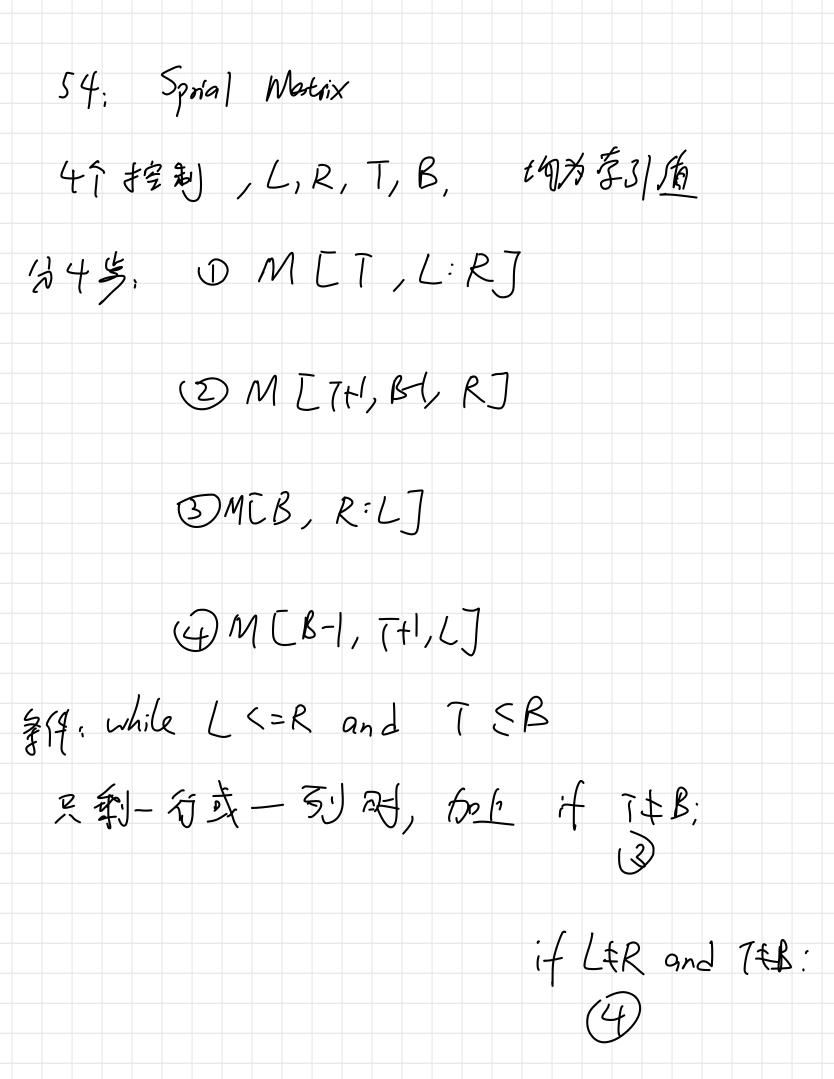

In [ ]:
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        if len(matrix) == 0:
            return []
        if len(matrix[0]) == 0:
            return []
        res = []
        left, top = 0, 0
        right = len(matrix[0]) - 1
        bottom = len(matrix) - 1
        while left <= right and top <= bottom:
            for i in range(left, right+1):
                res.append(matrix[top][i])

            for i in range(top+1, bottom):
                res.append(matrix[i][right])
            
            if top != bottom:
                for i in range(right, left-1, -1):
                    res.append(matrix[bottom][i])
            
            if left != right and top != bottom:
                for i in range(bottom-1, top, -1):
                    res.append(matrix[i][left])

            left += 1
            top += 1
            right -= 1
            bottom -=1
        return res

In [ ]:
class Solution:
    def isSubtree(self, s: TreeNode, t: TreeNode) -> bool:
        queue = [s]
        
        while len(queue) != 0:
            top = queue.pop(0)
            if self.is_same(top, t) is True:
                return True
            if not top.left:
                queue.append(top.left)
            if not top.right:
                queue.append(top.right)
            
        return False

### 315. Count of Smaller Numbers After Self

In [ ]:
You are given an integer array nums and you have to return a new counts array. The counts array has the property where counts[i] is the number of smaller elements to the right of nums[i].

Example:

Input: [5,2,6,1]
Output: [2,1,1,0] 
Explanation:
To the right of 5 there are 2 smaller elements (2 and 1).
To the right of 2 there is only 1 smaller element (1).
To the right of 6 there is 1 smaller element (1).
To the right of 1 there is 0 smaller element.


生成一个二叉搜索树，先class树节点

从后往前插入数字，如果val <= 当前节点值，那当前节点值count += 1

如果val > 当前节点值， 说明当前节点和它所有的左子树节点都小于val， 那res[idx] += 1 + count

每一个数字的插入过程，就可以计算出当前数字的结果

注意二叉搜索树的生成，只用了节点类，和递归

In [ ]:
class TreeNode:
    def __init__(self, val):
        self.val = val 
        self.left = None 
        self.right = None
        self.count = 0

class Solution:
    def countSmaller(self, nums: List[int]) -> List[int]:
        lth = len(nums)
        res = [0] * lth
        root = None 
        for i in reversed(range(lth)):
            root = self.insert(root, nums[i], res, i)
        return res 


    def insert(self, root, val, res, idx):
        if root == None:
            root = TreeNode(val)
        elif val <= root.val:
            root.count += 1
            root.left = self.insert(root.left, val, res, idx)
        else:
            res[idx] += (1 + root.count)
            root.right = self.insert(root.right, val, res, idx)
        return root

### 785. 判断二分图

In [ ]:
给定一个无向图graph，当这个图为二分图时返回true。

如果我们能将一个图的节点集合分割成两个独立的子集A和B，并使图中的每一条边的两个节点一个来自A集合，一个来自B集合，我们就将这个图称为二分图。

graph将会以邻接表方式给出，graph[i]表示图中与节点i相连的所有节点。每个节点都是一个在0到graph.length-1之间的整数。这图中没有自环和平行边： graph[i] 中不存在i，并且graph[i]中没有重复的值。

示例 1:
输入: [[1,3], [0,2], [1,3], [0,2]]
输出: true
解释: 
无向图如下:
0----1
|    |
|    |
3----2
我们可以将节点分成两组: {0, 2} 和 {1, 3}。

示例 2:
输入: [[1,2,3], [0,2], [0,1,3], [0,2]]
输出: false
解释: 
无向图如下:
0----1
| \  |
|  \ |
3----2
我们不能将节点分割成两个独立的子集。


In [ ]:
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        lth = len(graph)
        uncolor = 0
        green = 1
        red = 2
        color = [uncolor] * lth 
        for i in range(lth):
            if color[i] != uncolor:
                continue
            stack = [i]
            color[i] = green
            while stack:
                cur_point = stack.pop(0)
                adjpoint = graph[cur_point]
                adj_color = green if color[cur_point] == red else red
                for p in adjpoint:
                    if color[p] == uncolor:
                        color[p] = adj_color
                        stack.append(p)
                    elif color[p] != adj_color:
                        return False
        return True    

广度优先，逐点的染色

### 60. 第k个排列（数学解法） （可用backtrack）超时

In [ ]:
给出集合 [1,2,3,…,n]，其所有元素共有 n! 种排列。

按大小顺序列出所有排列情况，并一一标记，当 n = 3 时, 所有排列如下：

    "123"
    "132"
    "213"
    "231"
    "312"
    "321"

给定 n 和 k，返回第 k 个排列。

说明：

    给定 n 的范围是 [1, 9]。
    给定 k 的范围是[1,  n!]。

示例 1:

输入: n = 3, k = 3
输出: "213"


In [ ]:
# 一步一步计算k应该排第几
class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        self.res = ''

        from math import factorial
        #记录还没使用掉的数字
        nums_set = set()
        for i in range(1, n+1):
            nums_set.add(i)
        '''
        def factorial(n):
            if n == 0:
                return 1
            else:
                return n * factorial(n - 1)
        '''
        #计算此时k的开头数字是几，并获取，继续
        def helper(n, k):
            if n == 0:
                return
            F = factorial(n-1)
            R = int((k-1) / F) + 1
            num = get_R(R)
            self.res += str(num)
            helper(n-1, k - F * (R - 1) )
        # 在set中找到 还没使用掉的数字中， 排第R个的数字。即为k的开头数字
        def get_R(R):
            for i in range(1, n+1):
                if i in nums_set:
                    if R == 1:
                        nums_set.remove(i)
                        return i
                    else:
                        R -= 1
                else:
                    continue

        helper(n, k)
        return self.res





#backtrack
        
'''
class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        self.res = ''
        self.k = k
        #公用set
        nums_set = set()
        for i in range(1, n+1):
            nums_set.add(i)
        def DFS(track):
            if self.k == 0:
                return
            if len(track) == n:
                self.res = track
                self.k -= 1
            for i in range(1, n+1):
                if i in nums_set:
                    new_track = track + str(i)
                    nums_set.remove(i)
                    DFS(new_track[:])
                    nums_set.add(i)
                else:
                    continue
        DFS('')
        return self.res
'''

### 31. 下一个排列 必须原地修改

In [ ]:
实现获取下一个排列的函数，算法需要将给定数字序列重新排列成字典序中下一个更大的排列。

如果不存在下一个更大的排列，则将数字重新排列成最小的排列（即升序排列）。

必须原地修改，只允许使用额外常数空间。

以下是一些例子，输入位于左侧列，其相应输出位于右侧列。
1,2,3 → 1,3,2
3,2,1 → 1,2,3
1,1,5 → 1,5,1

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        #倒序数组指定下标范围
        def rev(i, j):
            while i < j:
                nums[i], nums[j] = nums[j], nums[i]
                i += 1
                j -= 1

        #找到递增的断点
        j = len(nums) - 1
        while j > 0:
            if nums[j] > nums[j-1]:
                break
            else:
                j -= 1
        #从后到前递增，直接返回最小的排列
        if j == 0:
            rev(0, len(nums) - 1)
            return 
        i = j - 1
        #找到从右开始第一个比nums[i] 大的下标
        for k in range(len(nums)-1, i, -1):
            if nums[k] > nums[i]:
                break
        #交换i ,k
        nums[i], nums[k] = nums[k], nums[i]
        #倒序 j 一直到最后
        rev(j, len(nums) - 1)

## 剑指offer

### 04. 二维数组中的查找

In [ ]:
在一个 n * m 的二维数组中，每一行都按照从左到右递增的顺序排序，每一列都按照从上到下递增的顺序排序。请完成一个函数，输入这样的一个二维数组和一个整数，判断数组中是否含有该整数。

示例:

现有矩阵 matrix 如下：

[
  [1,   4,  7, 11, 15],
  [2,   5,  8, 12, 19],
  [3,   6,  9, 16, 22],
  [10, 13, 14, 17, 24],
  [18, 21, 23, 26, 30]
]

给定 target = 5，返回 true。

给定 target = 20，返回 false。

**从二维数组的右上角开始查找。如果当前元素等于目标值，则返回 true。如果当前元素大于目标值，则移到左边一列。如果当前元素小于目标值，则移到下边一行。**

**可以证明这种方法不会错过目标值**



In [ ]:
class Solution:
    def findNumberIn2DArray(self, matrix: List[List[int]], target: int) -> bool:

        row = len(matrix)
        if row == 0:
            return False
        column = len(matrix[0])
        if column == 0:
            return False
        i = 0
        j = column - 1
        while j >= 0 and i <= row - 1:
            if matrix[i][j] == target:
                return True
            elif matrix[i][j] > target:
                j -= 1
            else:
                i +=1
        return False

### 09. 用两个栈实现队列

In [ ]:
用两个栈实现一个队列。队列的声明如下，请实现它的两个函数 appendTail 和 deleteHead ，分别完成在队列尾部插入整数和在队列头部删除整数的功能。(若队列中没有元素，deleteHead 操作返回 -1 )



In [ ]:
#stack 1 负责入队， stack2负责出队
如果stack2空了，此时要出队，则把stack1中的元素逐个拿出放入stack2， 可保证队列的性质
class CQueue:

    def __init__(self):
        self.stack1 = []
        self.stack2 = []


    def appendTail(self, value: int) -> None:
        self.stack1.append(value)


    def deleteHead(self) -> int:
        if len(self.stack2) != 0:
            return self.stack2.pop()
        if len(self.stack1) == 0:
            return -1
        else:
            while len(self.stack1) != 0:
                self.stack2.append(self.stack1.pop())
            return self.stack2.pop()



# Your CQueue object will be instantiated and called as such:
# obj = CQueue()
# obj.appendTail(value)
# param_2 = obj.deleteHead()

### 11. 旋转数组的最小数字

In [ ]:
把一个数组最开始的若干个元素搬到数组的末尾，我们称之为数组的旋转。输入一个递增排序的数组的一个旋转，输出旋转数组的最小元素。例如，数组 [3,4,5,1,2] 为 [1,2,3,4,5] 的一个旋转，该数组的最小值为1。  

示例 1：

输入：[3,4,5,1,2]
输出：1

示例 2：

输入：[2,2,2,0,1]
输出：0


In [ ]:
class Solution:
    def minArray(self, numbers: [int]) -> int:
        
        i = 0
        j = len(numbers) - 1
        if numbers[i] < numbers[j]:
            return numbers[0]
        while i < j:
            mid = (i+j) // 2
            
            #后段为降序，转换点一定在后段
            if numbers[j] < numbers[mid]:
                i = mid + 1
            #后段为升序，转换的在前端，此时要带上mid， mid也有可能是
            elif numbers[j] > numbers[mid]:
                j = mid
            #出现相等，无法判断，可以去除数组最后一个数，有mid与其相同，不会影响最终结果
            else:
                j -= 1
        return numbers[i]

### 22. 链表中倒数第k个节点

In [ ]:
输入一个链表，输出该链表中倒数第k个节点。为了符合大多数人的习惯，本题从1开始计数，即链表的尾节点是倒数第1个节点。例如，一个链表有6个节点，从头节点开始，它们的值依次是1、2、3、4、5、6。这个链表的倒数第3个节点是值为4的节点。

 

示例：

给定一个链表: 1->2->3->4->5, 和 k = 2.

返回链表 4->5.



**两个指针，一根先走k步，则先走的指针到None， 后走的正好在倒数第k个**

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getKthFromEnd(self, head: ListNode, k: int) -> ListNode:
        head1, head2 = head, head
        while k > 0:
            head2 = head2.next
            k -= 1
        while head2 is not None:
            head1 = head1.next
            head2 = head2.next
        return head1


### 26. 树的子结构

In [ ]:
输入两棵二叉树A和B，判断B是不是A的子结构。(约定空树不是任意一个树的子结构)

B是A的子结构， 即 A中有出现和B相同的结构和节点值。

例如:
给定的树 A:

     3
    / \
   4   5
  / \
 1   2
给定的树 B：

   4 
  /
 1
返回 true，因为 B 与 A 的一个子树拥有相同的结构和节点值。

示例 1：

输入：A = [1,2,3], B = [3,1]
输出：false



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def isSubStructure(self, A: TreeNode, B: TreeNode) -> bool:
        if A is None or B is None:
            return False 
        queue = [A]
        while len(queue) != 0:
            top = queue.pop(0)
            if top is None:
                continue
            if top.val == B.val:
                if self.twosame(top, B):
                    return True 
            queue.append(top.left)
            queue.append(top.right)
        return False


    def twosame(self, node1, node2):
        if node2 is None:
            return True
        elif node1 is None:
            return False

        if node1.val != node2.val:
            return False
        
        return self.twosame(node1.left, node2.left) and self.twosame(node1.right, node2.right)

### 31. 栈的压入、弹出序列

In [ ]:
输入两个整数序列，第一个序列表示栈的压入顺序，请判断第二个序列是否为该栈的弹出顺序。假设压入栈的所有数字均不相等。例如，序列 {1,2,3,4,5} 是某栈的压栈序列，序列 {4,5,3,2,1} 是该压栈序列对应的一个弹出序列，但 {4,3,5,1,2} 就不可能是该压栈序列的弹出序列。

 

示例 1：

输入：pushed = [1,2,3,4,5], popped = [4,5,3,2,1]
输出：true
解释：我们可以按以下顺序执行：
push(1), push(2), push(3), push(4), pop() -> 4,
push(5), pop() -> 5, pop() -> 3, pop() -> 2, pop() -> 1

示例 2：

输入：pushed = [1,2,3,4,5], popped = [4,3,5,1,2]
输出：false
解释：1 不能在 2 之前弹出。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/zhan-de-ya-ru-dan-chu-xu-lie-lcof
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
class Solution:
    def validateStackSequences(self, pushed: List[int], popped: List[int]) -> bool:
        stack = [] #模拟栈
        
        i = 0
        j = 0
        while i < len(pushed):
            #此时将要入栈的是pushed i ，判断它是否应该入栈
            if len(stack) == 0:
                stack.append(pushed[i])
                i += 1
            elif stack[-1] == popped[j]:
                stack.pop()
                j += 1
            else:
                stack.append(pushed[i])
                i += 1
        #所有元素入栈完毕，此时一定有元素没出栈，通过j 和栈来判断，是否是真确的出栈顺序
        while j < len(popped) and stack[-1] == popped[j]:
            stack.pop()
            j += 1
            
        if len(stack) == 0:
            return True
        else:
            return False

###  43. 1～n整数中1出现的次数

In [ ]:
输入一个整数 n ，求1～n这n个整数的十进制表示中1出现的次数。

例如，输入12，1～12这些整数中包含1 的数字有1、10、11和12，1一共出现了5次。

 

示例 1：

输入：n = 12
输出：5

示例 2：

输入：n = 13
输出：6


In [ ]:
class Solution:
    def countDigitOne(self, n: int) -> int:
        if n == 0:
            return 0
        if n < 10:
            return 1
        n = str(n)
        lth = len(n)
        res = 0
        for i in range(lth):
            cur = int(n[i])
            if i == 0:
                pre = 0
            else: 
                pre = int(n[0:i])
            if i == lth - 1:
                aft = 0
            else:
                aft = int(n[i+1:])

            if cur == 0:
                res += 10 ** (lth -1 -i) * pre 
            elif cur == 1:
                res += 10 ** (lth -1 -i) * pre
                res += aft + 1
            else:
                res += 10 ** (lth -1 -i) * (pre + 1)
        return res 


根据每一位数字之前和之后是几，以及分类0， 1， 大于1

可以计算出当前为出现1 的个数总和

### 48. 最长不含重复字符的子字符串

In [ ]:
请从字符串中找出一个最长的不包含重复字符的子字符串，计算该最长子字符串的长度。

 

示例 1:

输入: "abcabcbb"
输出: 3 
解释: 因为无重复字符的最长子串是 "abc"，所以其长度为 3。

示例 2:

输入: "bbbbb"
输出: 1
解释: 因为无重复字符的最长子串是 "b"，所以其长度为 1。


In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        L = len(s)
        hashset = set()
        i, j = 0, 0
        res = 0
        while i < L and j < L:
            while j < L and s[j] not in hashset:
                hashset.add(s[j])
                j += 1
            res = max(res, j - i)
            hashset.remove(s[i])
            i += 1
        return res

In [9]:
str([1,2,None])

'[1, 2, None]'

In [10]:
list(str([1,2,None]))

['[', '1', ',', ' ', '2', ',', ' ', 'N', 'o', 'n', 'e', ']']

In [13]:
"1".split("_")

['1']

## collections 模块

In [1]:
import collections

### Counter() 是 dict的子类

In [3]:
words = ["a", "a", "b", "c"]
cnt = collections.Counter()

In [10]:
for i in cnt:
    print(i)

In [16]:
cnt["a"]

0

In [4]:
#直接加入，不需要考虑是否存在
for w in words:
    cnt[w] += 1
print(cnt)

Counter({'a': 2, 'b': 1, 'c': 1})


In [6]:
cnt.values()

dict_values

### deque

deque

deque是栈和队列的一种广义实现，deque是"double-end queue"的简称；deque支持线程安全、有效内存地以近似O(1)的性能在deque的两端插入和删除元素，尽管list也支持相似的操作，但是它主要在固定长度操作上的优化，从而在pop(0)和insert(0,v)（会改变数据的位置和大小）上有O(n)的时间复杂度。

deque支持如下方法，

append(x)， 将x添加到deque的右侧；

appendleft(x)， 将x添加到deque的左侧；

clear()， 将deque中的元素全部删除，最后长度为0；

count(x)， 返回deque中元素等于x的个数；

extend(iterable)， 将可迭代变量iterable中的元素添加至deque的右侧；

extendleft(iterable)， 将变量iterable中的元素添加至deque的左侧，往左侧添加序列的顺序与可迭代变量iterable中的元素相反；

pop()， 移除和返回deque中最右侧的元素，如果没有元素，将会报出IndexError；

popleft()， 移除和返回deque中最左侧的元素，如果没有元素，将会报出IndexError；

remove(value)， 移除第一次出现的value，如果没有找到，报出ValueError；

reverse()， 反转deque中的元素，并返回None；

rotate(n)， 从右侧反转n步，如果n为负数，则从左侧反转，d.rotate(1)等于d.appendleft(d.pop())；

maxlen， 只读的属性，deque的最大长度，如果无解，就返回None；

除了以上的方法之外，deque还支持迭代、序列化、len(d)、reversed(d)、copy.copy(d)、copy.deepcopy(d)，通过in操作符进行成员测试和下标索引，索引的时间复杂度是在两端是O(1)，在中间是O(n)，为了快速获取，可以使用list代替。


In [2]:
a = collections.deque()
a.appendleft(1)

In [4]:
a[1]

IndexError: deque index out of range

### defaudict

In [2]:
D = collections.defaultdict(list)

In [5]:
type(D[1])

list

In [3]:
D["a"].append(1)

In [4]:
D

defaultdict(list, {'a': [1]})

## heapq

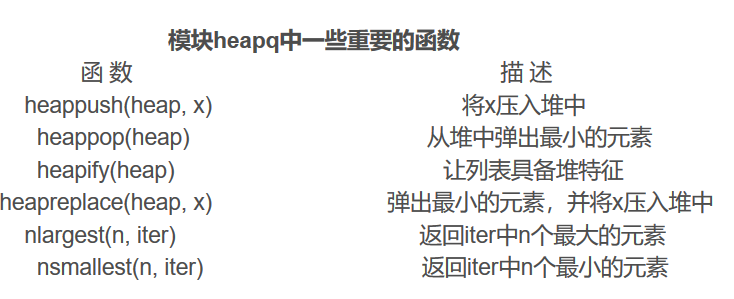

In [1]:
import heapq as Heap

In [7]:

Heap.heappush(myheap, 1)

In [10]:
Heap.nsmallest(1, myheap)

[1]

In [12]:
myheap[0]

1

In [2]:
# .heappush()
myheap = []
lst = [1,3,4,5,7,3,6,8,4,6,9,20]
for i in lst:
    Heap.heappush(myheap, i)
print(myheap)

[1, 3, 3, 4, 6, 4, 6, 8, 5, 7, 9, 20]


In [3]:
# .heappop()
top = Heap.heappop(myheap)
print(top)
print(myheap)

1
[3, 3, 4, 4, 6, 20, 6, 8, 5, 7, 9]


In [ ]:
#heapq.heapify(x)  Transform list x into a heap, in-place, in linear time.


In [12]:
(5,1) > (4,3)

True

### defalu

In [12]:
import math

In [19]:
(math.atan(-1) + math.pi) * (180 / math.pi)

135.0

In [7]:
math.pi / 4

0.7853981633974483

In [13]:
math.atan2()

1.5707963267948966